# EDA PROJECT
- Data: Crawled_Data.csv
- The data is extracted from a website (webrank.vn)
- By: Vi Pham
- Github: https://github.com/anhvi02/EDA_CrawledData

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATA

In [84]:
df = pd.read_csv('Crawled_Data.csv')
df.drop(columns={'Unnamed: 0'}, inplace=True)
df.head(5)

,Website,Lĩnh vực,Traffic,U.Visitor,T/Gian,Page.Visit,PC vs Mobile,Trị giá
0,youtube.com,Giải Trí,677990704,60207236,27:00,4.70,21.67%,"394,265,449 USD"
1,google.com,Công nghệ,526252980,75240611,21:27,3.34,40.51%,"402,260,531 USD"
2,facebook.com,Công nghệ,249247541,47305238,27:37,3.27,50.21%,"86,066,277 USD"
3,vnexpress.net,Tin tức,108599729,13972155,20:37,3.55,14.33%,"1,338,351 USD"
4,truyenfull.vn,Giải Trí,87648359,8094622,54:34,7.71,2.23%,"858,829 USD"


In [85]:
df.shape 

(25000, 8)

Reformat data

In [86]:
df.rename(columns={'Lĩnh vực':'Field',
                    'U.Visitor':'Visitor', 
                    'T/Gian': 'Average Time',
                    'Page.Visit': 'Page/Visit',
                    'Trị giá': 'Value'}, inplace=True)
df.head(3)

,Website,Field,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
0,youtube.com,Giải Trí,677990704,60207236,27:00,4.70,21.67%,"394,265,449 USD"
1,google.com,Công nghệ,526252980,75240611,21:27,3.34,40.51%,"402,260,531 USD"
2,facebook.com,Công nghệ,249247541,47305238,27:37,3.27,50.21%,"86,066,277 USD"


### Acronyms:
- Traffic: total accesses.
- Visitor: total visitors. If an IP access the website and experienced 3 pages of the website, the count for Visitor is 1 and Traffic is 3
- Average Time (minutes): average use time of an IP/total visitors
- Page/Visit: average pages experienced by an IP/total visitors
- PC vs Mobile (percentage): rate of visitors using PC in comparison with that of Mobile
- Value (USD): value of the website based on 3 factors: traffic, expense on ads and growth rate

Convert Value column from categorical to numerical 

In [87]:
# remove USD
rm1 = df['Value'].str.replace(',','')
rm2 = rm1.str.replace(' USD', '')
df['Value'] = rm2.astype(float) 

# remove % 
rm3 = df['PC vs Mobile'].str.replace('%','')
df['PC vs Mobile'] = rm3.astype(float) 

# conver to minutes
new_time = []
for ele in df['Average Time']:
    second = int(ele[-2:])/60
    minute = round(int(ele[:-3]) + second,2)
    new_time.append(minute)
df['Average Time'] = new_time

df.head(5) 

,Website,Field,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
0,youtube.com,Giải Trí,677990704,60207236,27.00,4.70,21.67,394265449.0
1,google.com,Công nghệ,526252980,75240611,21.45,3.34,40.51,402260531.0
2,facebook.com,Công nghệ,249247541,47305238,27.62,3.27,50.21,86066277.0
3,vnexpress.net,Tin tức,108599729,13972155,20.62,3.55,14.33,1338351.0
4,truyenfull.vn,Giải Trí,87648359,8094622,54.57,7.71,2.23,858829.0


# DATA PREPROCESSING

Duplicated data

In [88]:
df[df.duplicated()]

,Website,Field,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
50,youtube.com,Giải Trí,677990704,60207236,27.00,4.70,21.67,394265449.0
51,google.com,Công nghệ,526252980,75240611,21.45,3.34,40.51,402260531.0
52,facebook.com,Công nghệ,249247541,47305238,27.62,3.27,50.21,86066277.0
53,vnexpress.net,Tin tức,108599729,13972155,20.62,3.55,14.33,1338351.0
54,truyenfull.vn,Giải Trí,87648359,8094622,54.57,7.71,2.23,858829.0
...,...,...,...,...,...,...,...,...
6545,edu.1c.ru,NaN,42418,4666,29.15,2.55,100.00,36616.0
6546,pachaiphong.vn,NaN,42391,41055,20.50,1.06,28.37,357.0
6547,monngon.tv,Thực phẩm,42378,37406,2.75,1.20,55.06,369.0
6548,well.ca,Sức khỏe,42360,4236,10.80,1.60,100.00,16767.0


In [89]:
# Remove 350 duplicates
df.drop_duplicates(inplace=True)

In [90]:
df.shape

(24650, 8)

Missing Values

In [91]:
df.isnull().sum()

Website            0
Field           3133
Traffic            0
Visitor            0
Average Time       0
Page/Visit         0
PC vs Mobile       0
Value              0
dtype: int64

In [92]:
df['Field'].unique()

array(['Giải Trí', 'Công nghệ', 'Tin tức', nan, 'Trò chơi', 'TMDT',
       'Tài liệu', 'Người lớn', 'Social Casino', 'Sức khỏe', 'Khoa học',
       'Thể thao', 'Nghề nghiệp', 'Tài chính', 'Chính phủ', 'Đời sống',
       'Doanh nghiệp', 'Nhà cửa', 'Xe cộ', 'Thực phẩm', 'Du lịch',
       'Động vật', 'Sở thích', 'Cộng đồng', 'Công nghiệp'], dtype=object)

In [93]:
# Replace nulls in the Field column with 'Missing'
df['Field'] = df['Field'].fillna('Missing')
df.isnull().sum()

Website         0
Field           0
Traffic         0
Visitor         0
Average Time    0
Page/Visit      0
PC vs Mobile    0
Value           0
dtype: int64

# Analysis

### Data Type

In [94]:
df.dtypes

Website          object
Field            object
Traffic           int64
Visitor           int64
Average Time    float64
Page/Visit      float64
PC vs Mobile    float64
Value           float64
dtype: object

### Descriptive statistics

In [95]:
df.describe()

,Traffic,Visitor,Average Time,Page/Visit,PC vs Mobile,Value
count,2.465000e+04,2.465000e+04,24650.000000,24650.000000,24650.000000,2.465000e+04
mean,2.452059e+05,7.588851e+04,10.079852,2.883843,83.708623,1.132181e+05
std,5.957803e+06,8.230523e+05,14.347987,5.236847,28.924637,3.717009e+06
min,3.106000e+03,3.130000e+02,0.000000,0.340000,0.000000,2.600000e+01
25%,6.115000e+03,4.048250e+03,1.500000,1.250000,77.137500,1.310000e+02
50%,1.304300e+04,8.137500e+03,6.200000,1.800000,100.000000,1.706000e+03
75%,4.276450e+04,2.191050e+04,13.377500,3.050000,100.000000,1.899075e+04
max,6.779907e+08,7.524061e+07,303.020000,489.300000,100.000000,4.022605e+08


### Data distribution

Numerical columns

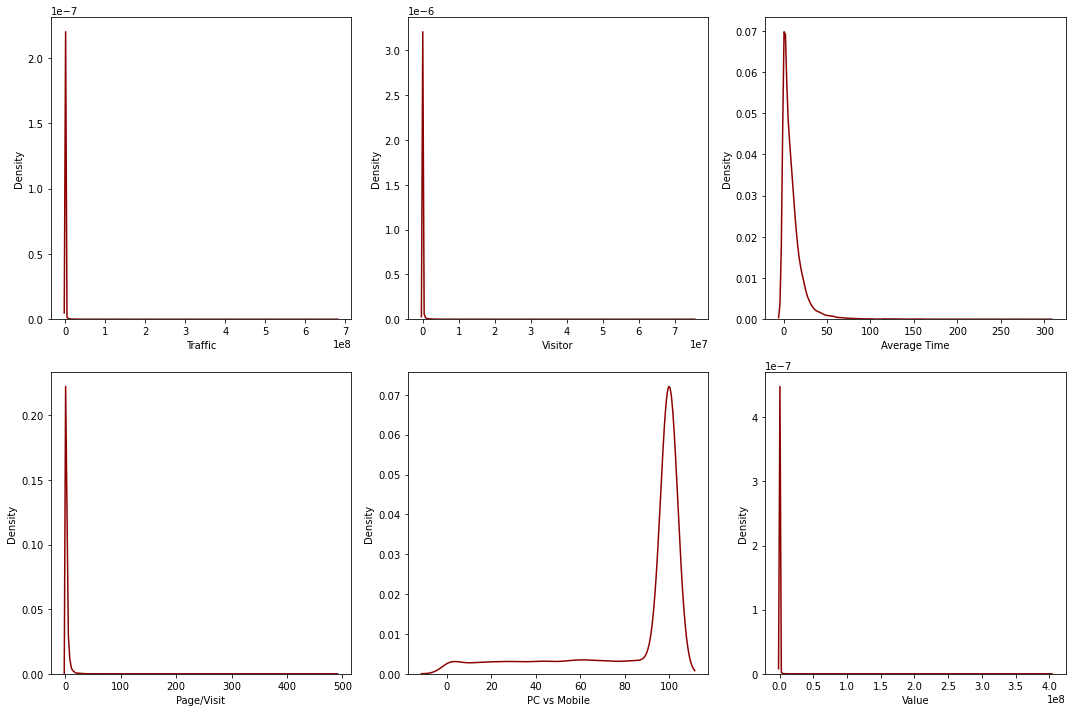

In [96]:
plt.figure(figsize=(15,10))
columns = ['Traffic','Visitor','Average Time', 'Page/Visit','PC vs Mobile','Value']
for ind, col in enumerate(columns):
    plt.subplot(2,3, ind+1)
    sns.kdeplot(df[col], color='darkred')
plt.tight_layout()
plt.show()

- It is clear that data distribution in all numerical columns is imbalanced
- This indicates the significant difference in the popularity between multiple websites

Categorical column

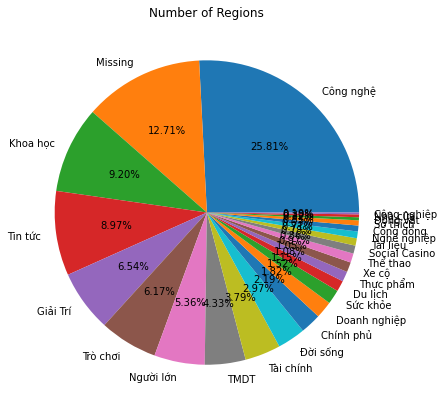

In [97]:
labels = df['Field'].value_counts().index
sizes = df['Field'].value_counts ().values

plt.figure(figsize =(7,7), facecolor='white')
plt.pie(sizes, labels=labels, autopct="%.2f%%")
plt.title("Number of Regions")
plt.show()

- TECHNOLOGY dominates the chart with 26.28%
- MISSING accounts for a huge a proportion 

### Relationship analysis

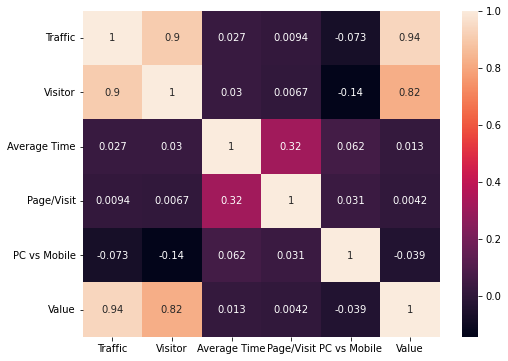

In [98]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data=corr, annot=True)
plt.show()

- There are noticeable correlations between Traffic/Value and Visitor/Value. Obviously, the value of a website is based on the number of Traffic and Visitor 
- There is a high correlation between Visitors and Traffic. This is because the count of Traffic relies on the count of Visitor. If an IP didn't visit the website, there wouldn't be any increase in Traffic.  